Ayudantía Estadística I - Primavera 2020 <img src="img/logo_ua.png" width="20%" align="right" />
<br />
<br />
<br />
<br />
<br />

# Análisis de correlación

Seguramente, alguna vez, has escuchado cosas como que fumar está relacionado al cáncer de pulmón o de laringe, o quizás haz relacionado horas de estudio con la nota obtenida, o quizás hayas intuido que el precio de un automóvil usado es menor a medida que más años de uso tenga. A esto se le conoce como **correlación**, la cual es un tipo de relación especial entre variables, en la cual el aumento o disminución de una de las variables, conlleva el aumento o disminución de la otra. 

Según Walpole (2012):

> ***El análisis de correlación intenta medir la fuerza de tales relaciones entre dos variables por medio de un solo número denominado Coeficiente de Correlación***.

Una correlación existe entre dos variables cuando valores mayores de una variable van de manera consistente con valores mayores de otra variable o cuando valores grandes de una variable corresponden de manera consistente a valores menores de otra variables.

Antes de continiur, debemos tener en cuenta las siguientes observaciones:

* Sólo estudiaremos correlaciones lineales.
* El que exista correlación entre dos variables no implica causalidad. Es decir, si se llega a establecer que existe correlación entre dos variables no significa que cambios en una variable **causen** cambios en la otra.

## ¿Cómo detectar correlación entre variables?

Para determinar si existe correlación entre dos variables, podemos empezar con los métodos gráficos. Para ello, el gráfico de dispersión o *scatterplot* nos puede ser de mucha utilidad. Un gráfico de dispersión es una gráfica en la que los valores de dos variables se presentan como puntos. Para cada punto de datos, el valor de la primera variable se representa en el eje X, los valores de la segunda variable en el eje Y.

Vamos a usar R para explorar correlaciones. Para ello, importaremos la base de datoa *mpg.csv*, la cual contiene observaciones sobre disintos modelos de automóviles, incluyendo su potencias medida en caballos de fuerza, el rendimiento medido en millas por galón, su masa, acelaración, modelo, origen del vehículo, entre otras variables.

In [6]:
# importamos los datos
df_mpg <- read.csv("datos/mpg.csv", header = TRUE, dec = ".")
head(df_mpg)

X,mpg,nro_cilindros,desplazamiento,caballos_fuerza,masa,aceleracion,ano_modelo,origen,nombre
0,18,8,307,130,3504,12.0,70,usa,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,usa,buick skylark 320
2,18,8,318,150,3436,11.0,70,usa,plymouth satellite
3,16,8,304,150,3433,12.0,70,usa,amc rebel sst
4,17,8,302,140,3449,10.5,70,usa,ford torino
5,15,8,429,198,4341,10.0,70,usa,ford galaxie 500


Comencemos por trazar un gráfico de dispersión entre las variables ```caballos_fuerza``` y ```masa```:

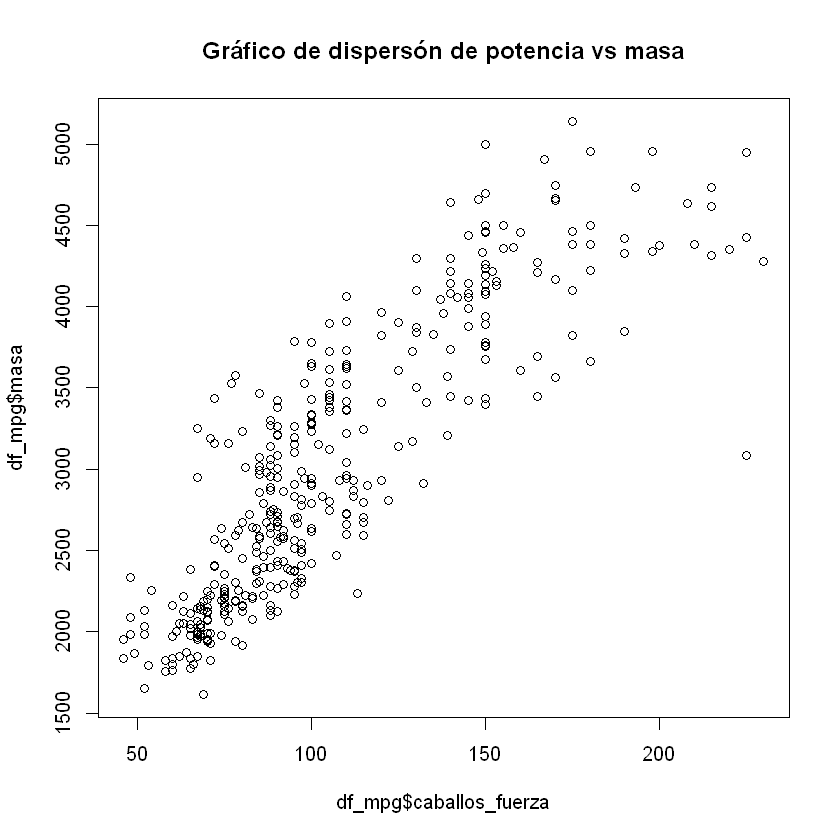

In [7]:
plot(df_mpg$caballos_fuerza, df_mpg$masa, main = "Gráfico de dispersón de potencia vs masa")

Vemos que, en general, los puntos de datos siguen una clara tendencia ascendente. Es decir, cada vez que aumenta una variable, por ejemplo, ```caballos_fuerza```, aumenta también la variable ```masa```. Lo mismo podemos decir para el caso contrario: si disminuye una de las variables, la otra también lo hará.

Podemos realizar el gráfico anterior para cada par de variables que queramos utilizar. Sin embargo, una manera de visualizar todos los *scatter plots* de una sola vez, es usando la función ```pairs```. Esta función, al pasársele un objeto del tipo *data frame*, traza los gráficos de dispersión bivariantes (de dos variables) entre las columnas del *data frame*.

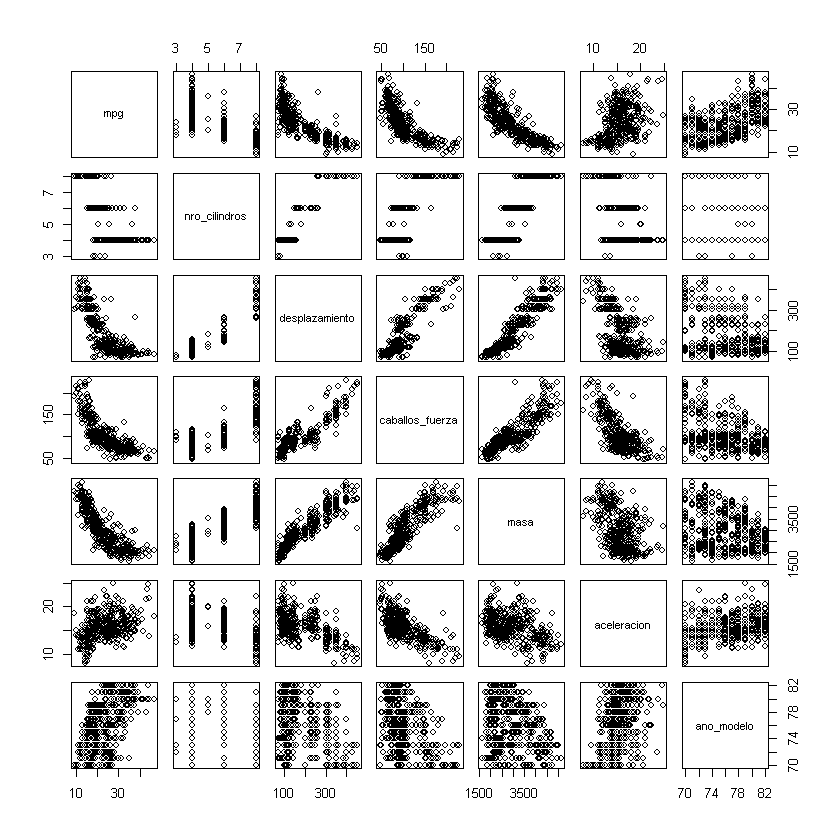

In [12]:
# Sólo tomaremos en cuenta desde la segunda a la octava columna
pairs(df_mpg[, 2:8])

Cada fila y cada columna del gráfico anterior representa una variable. Los gráficos por debajo y por encima de la diagonal son los mismos, por lo que podemos pasar por alto una de las dos partes. Cada *scatter plot* se traza según las variables que se intersectan por fila y columnas. Por ejemplo, en la cuarta fila (desde arriba hacia abajo) y tercera columna (de izquierda a derecha), tenemos el gráfico de dispersión de la variable ```caballos_fuerza``` y ```desplazamiento```. En la diagonal, es donde se intersectan las variables consigo mismas, por lo que se represeenta el nombre de cada variable.

Podemos detectar correlación entre varios pares de variables: las ya mencionadas ```caballos_fuerza``` y ```desplazamiento```, entre ```masa``` y ```caballos_fuerza```, ```acelaracion``` y ```caballos_fuerza```, etc.

## Covarianza

La covarianza se define como:

$$S_{X, Y} = \sigma_{XY} = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{n}$$

¿Y qué es la covarianza? La covarianza entre dos variables es una medida de la naturaleza de la asociación entre ambas.

* Si valores grandes de $X$ a menudo dan como resultado valores grandes de $Y$, entonces $X – \bar{x}$ positiva con frecuencia dará como resultado $Y – \bar{y}$ positivo.
* Si valores pequeños de $X$ dan como resultado valores pequeños de $Y$, entonces $X – \bar{x}$ negativa a menudo dará como resultado $Y – \bar{y}$ negativa.

Por consiguiente, el producto $(X – \mu_X)(Y – \mu_Y)$ tenderá a ser positivo. 

Por otro lado, si con frecuencia valores grandes de $X$ dan como resultado valores pequeños de $Y$, entonces el producto $(X – \mu_X)(Y – \mu_Y)$ tenderá a ser negativo. **El signo de la covarianza indica si la relación entre dos variables aleatorias dependientes es positiva o negativa**.

> "La covarianza es una medida de gran importancia por su signo, más que por el valor que pueda alcanzar; el signo indica el sentido de la variación conjunta de las variables que estamos considerando. De esta forma, si la covarianza es positiva, quiere decir que ambas variables varían en el mismo sentido alrededor de sus medias, mientras qque si la variación de las mismas tiene lugar en sentido contrario, la covarianza tomará valores negativos" (Pérez, 2015)

In [16]:
cov(df_mpg[2:8])

,mpg,nro_cilindros,desplazamiento,caballos_fuerza,masa,aceleracion,ano_modelo
mpg,61.08961,-10.308911,-655.4023,NA,-5505.2117,9.058930,16.741163
nro_cilindros,-10.30891,2.893415,168.6232,NA,1290.6956,-2.370842,-2.193499
desplazamiento,-655.40232,168.623214,10872.1992,NA,82368.4232,-156.332976,-142.717137
caballos_fuerza,NA,NA,NA,NA,NA,NA,NA
masa,-5505.21175,1290.695575,82368.4232,NA,717140.9905,-974.899011,-959.946344
aceleracion,9.05893,-2.370842,-156.3330,NA,-974.8990,7.604848,2.938105
ano_modelo,16.74116,-2.193499,-142.7171,NA,-959.9463,2.938105,13.672443


La covarianza entre las variables ```desplazamiento``` y ```mpg``` tiene un valor de -655,40232, lo cual quiere decir que la variación de las variables se mueve en sentido contrario: mientras que una de las variables varia a la derecha de su medias, la otra lo hace hacia la izquierda. 

Por el contrario, la covarianza de las variables ```masa``` y ```desplazamiento``` tiene un valor de 82368,4232. Esto quiere decir que ambas variables varian en la misma dirección.

Compara estos resultados con los respectivos gráficos de dispersión que hicimos más arriba. ¿Te hacen sentido estos valores respecto a lo que ves en los gráficos?

Por otra parte, ¿Por qué la variable ```caballos_fuerza``` presenta un ```NA``` en vez de un número? Debido a que esta variable tiene **valores ausentes** (*missing values*).

In [19]:
is.na(df_mpg$caballos_fuerza)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[337]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE

In [20]:
# El total de valores ausentes
sum(is.na(df_mpg$caballos_fuerza))

[1] 6

## Coeficiente de correlación de Pearson

La covarianza no indica la fuerza de la relación que pueda existir entre las variables en estudio. Un valor positivo muy grande o muy pequeño puede deberse simplemente a las unidades de medición y no a que exista mayor o menor grado de la relación. Esto se debe a que la covarianza presenta como inconveniente el hecho de que su valor depende de la escala elegida para los ejes. 

Existe una "versión" de la covarianza que no posee escala, la cual se denomina **coeficiente de correalción**, y se define como:

$$\rho_{XY} =r= \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2}}\sqrt{\sum{(y_i-\bar{y})^2}}}$$

El coeficiente de correlación trata de establecer la fuerza y dirección que existe entre las dos variables que intervienen en una distribución bidimensional. Tiene las siguientes propiedades:

* Los valores del coeficiente de correlación pueden estar entre −1 y 1, es decir, $-1\le{r}\le{1}$.
* Si el coefinciete de correlación es igual a 0, indica que no existe relación lineal, sin embargo, puede existir una relación no lineal (cuadrática, cúbica u otra).
* Si $r$ tiende a $−1$ o a $1$, los puntos tienden a estar más alineados en el gráfico de dispersión. Cuando r es igual a 1 o a −1, los puntos están perfectamente alineados.
* Una correlación positiva o directa entre las variables, da como resultado un coeficiente de correlación positivo ($r\gt{0}$). Mientras más cercano sea el valor a $1$, más fuerte es la correlación.
* Una correlación negativa o inversa entre las variables, da como resultado un coeficiente de correlación negativo ($r\lt{0}$). Mientras más cercano sea el valor a $-1$, más fuerte es la correlación. 

¿Cómo podemos interpretar la "fuerza" de la relación entre las variables que indica el coeficiente de correlación? En general, se puede afirmar lo siguiente (aunque cada autor puede presentar variaciones de la misma interpretación):

<img src="img/interpretación_coef_corr.png" width="60%" />

Calculemos ahora en R los coeficientes de correlación para cada para de variables de nuestro *data frame* ```mpg```. Para ellos, debemos usar la función ```cor```, a la cual debemos pasarles los parámetros ```x``` e ```y```, los cuales corresponden a cada una de las variables.

In [23]:
# Coefinciente de correlación para las variables masa y desplazamiento
cor(df_mpg$masa, df_mpg$desplazamiento)

[1] 0.9328241

Podemos ver que el coeficiente de correlación entre las variables ```masa``` y ```desplazamiento``` tiene un valor de $0.93$ aproximadamente, indicando una correlación positiva y muy fuerte entre ambas variables.

Ahora calcularemos el coeficiente para otro par de variables:

In [24]:
# Coefinciente de correlación para las variables masa y mpg
cor(df_mpg$masa, df_mpg$mpg)

[1] -0.8317409

En este caso, el coeficiente de correlación entre las variables ```masa``` y ```mpg``` (millas por galón) tiene un valor de $-0.83$ aproximadamente, lo cual nos indica una correlación inversa y muy fuerte entre ambas variables: A más masa del automóvil, mayor el consumo de combustible.

A la función ```cor```, podemos también pasarle directamente un objeto del tipo *data frame*. En este caso, al tratarse de más de dos variables, la función nos devolverá una matriz cuyos valores corresponderán a los coeficientes de correlación de cada par de variables que se intersectan por filas y columnas. Apliquemos la función a nuestro *data frame*:

In [25]:
cor(df_mpg[, 2:8])

,mpg,nro_cilindros,desplazamiento,caballos_fuerza,masa,aceleracion,ano_modelo
mpg,1.0000000,-0.7753963,-0.8042028,NA,-0.8317409,0.4202889,0.5792671
nro_cilindros,-0.7753963,1.0000000,0.9507214,NA,0.8960168,-0.5054195,-0.3487458
desplazamiento,-0.8042028,0.9507214,1.0000000,NA,0.9328241,-0.5436841,-0.3701642
caballos_fuerza,NA,NA,NA,1,NA,NA,NA
masa,-0.8317409,0.8960168,0.9328241,NA,1.0000000,-0.4174573,-0.3065643
aceleracion,0.4202889,-0.5054195,-0.5436841,NA,-0.4174573,1.0000000,0.2881370
ano_modelo,0.5792671,-0.3487458,-0.3701642,NA,-0.3065643,0.2881370,1.0000000


A la función ```cor```, podemos también indicarle el método que deseamos usar, según el tipo de variable que tengamos, para calcular el coeficiente de correlación a través del argumento ```method```. Los métodos pueden ser:

* "pearson"
* "spearman"
* "kendall"

El método por defecto es el de ```"pearson"```.

Por ejemplo:

In [33]:
cor(df_mpg$aceleracion, df_mpg$desplazamiento, method = "pearson")

[1] -0.5436841

Podemos trazar un gráfico más detallado para denotar los coeficientes de correlación entre variables junto con los respectivos gráficos de dispersión. Para ello, usaremos la función ```pairs.panels``` de la biblioteca "**psych**". Empezaremos por instalar el paquete:

In [29]:
install.packages("psych")

also installing the dependencies 'tmvnsim', 'mnormt'



package 'tmvnsim' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\leona\AppData\Local\Temp\Rtmpu8jdCA\downloaded_packages


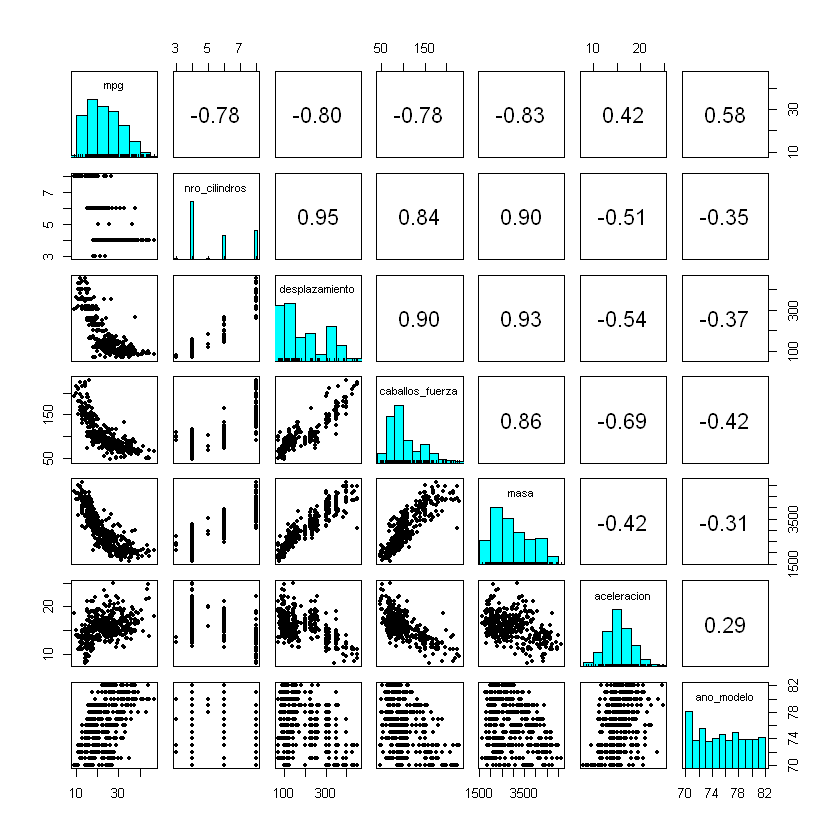

In [31]:
# Carfamos en memoria la librería
library(psych)

pairs.panels(df_mpg[, 2:8], # Pasamos nuestro data frame
            method = "pearson", # indicamos el método de coeficiente de correlación
            density = FALSE, # le indicamos que no queremos el gráfico de densidad (KDE)
            ellipses = FALSE, # le indicamos que no queremos las elipes
            smooth = FALSE) # le indicamos que no queremos ver la recta de regresión en cada uno de los scatter plots

En la diagonal de la matriz de gráficos podemos ver los histogramos de cada variable. Bajo la diagonal, se trazan los gráficos de dispersion o *scatter plots* para cada par de variables que se intersectan según filas y columnas. Y sobre la diagonal, se nos muestra el valor del coeficiente de correlación para cada par de variables intersectadas. Compara los coeficiente de correlación de cada par de variables con su respecto gráfico de dispersión.

Debemos recordar que el coeficiente de correlación solo mide correlaciones lineales. Puede pasar por alto completamente relaciones no lineales. Por ejemplo, en la tercera fila de la siguiente imágen, podemos ver que los coeficientes de correlación para cada gráfico de dispersión tienen el valor de 0, a pesar de que es evidente de que existe algún tipo de relación entre las variables (créditos: DenisBoigelot, original uploader was Imagecreator - Own work, original uploader was Imagecreator, CC0, https://commons.wikimedia.org/w/index.php?curid=15165296).

<img src="img/correlation_examples.svg" width="70%" />